In [33]:
# !pip install -q transformers

In [34]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
from transformers import pipeline
import numpy as np
from PIL import Image, ImageDraw
import requests
import torch

checkpoint = "google/owlvit-base-patch32"
checkpoint2 = "google/owlvit-base-patch16"
# checkpoint = "facebook/detr-resnet-101"

detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


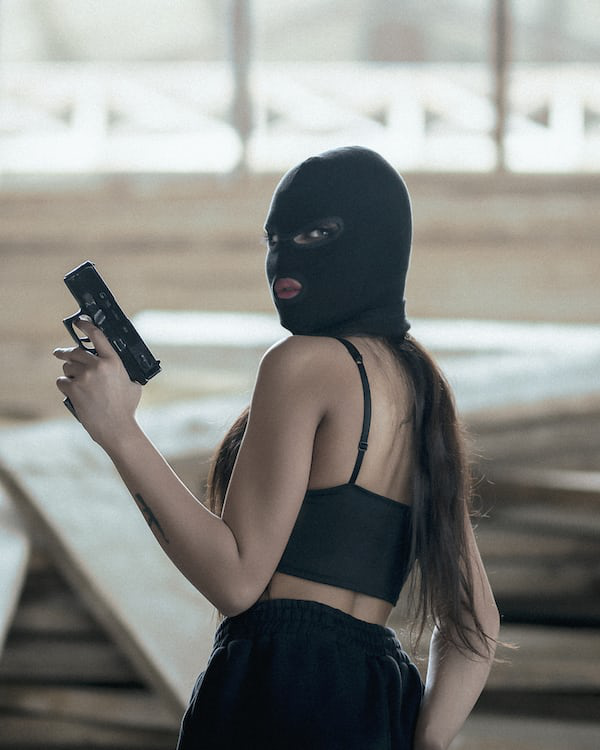

In [35]:
url = "https://images.unsplash.com/photo-1591364011658-b2db9b314a40?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NDF8fGd1bnxlbnwwfHwwfHx8MA%3D%3D&auto=format&fit=crop&w=600&q=60"

im = Image.open(requests.get(url, stream=True).raw)
im

In [36]:
text_queries = ["gun", "mask", "human face"]

inputs = processor(text=text_queries, images=im, return_tensors="pt")

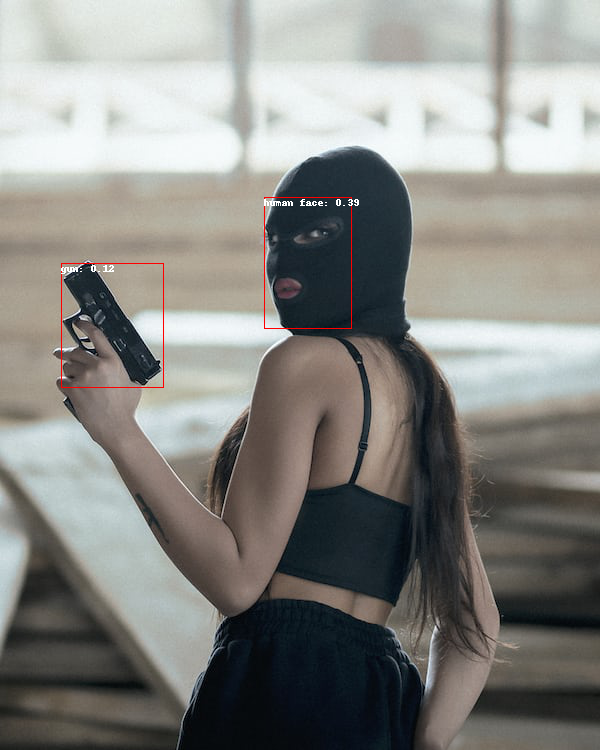

In [37]:
import torch

with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(im)

scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="white")

im

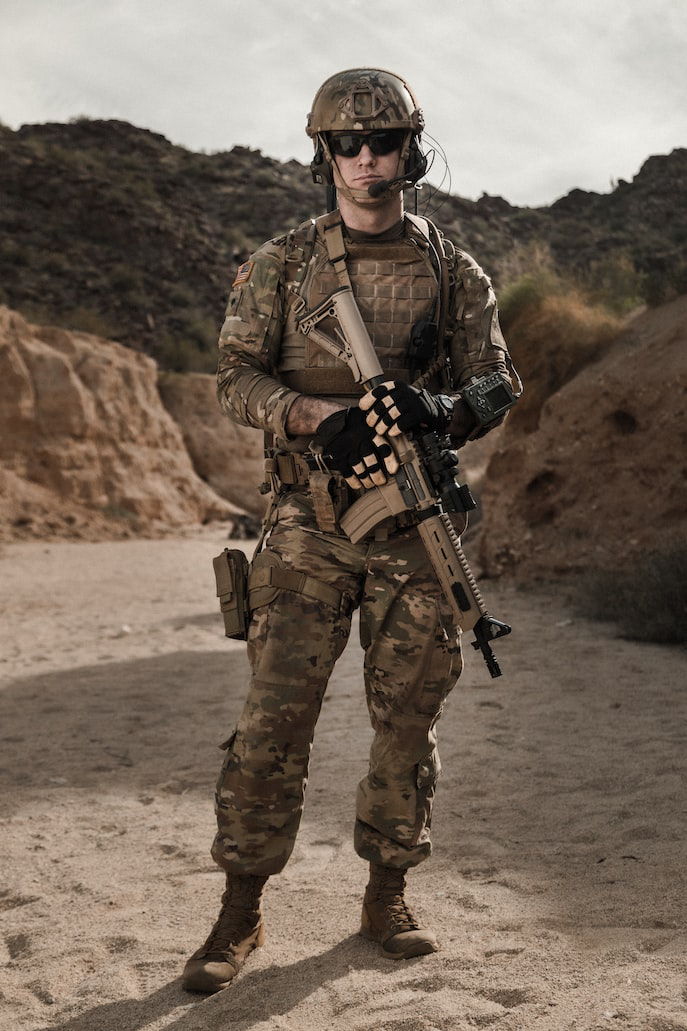

In [38]:
url2 = "https://images.unsplash.com/photo-1579912437766-7896df6d3cd3?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=687&q=80"
im = Image.open(requests.get(url2, stream=True).raw)

im

In [39]:
text_queries = ["gun","knife", "mask", "human face"]

inputs = processor(text=text_queries, images=im, return_tensors="pt")

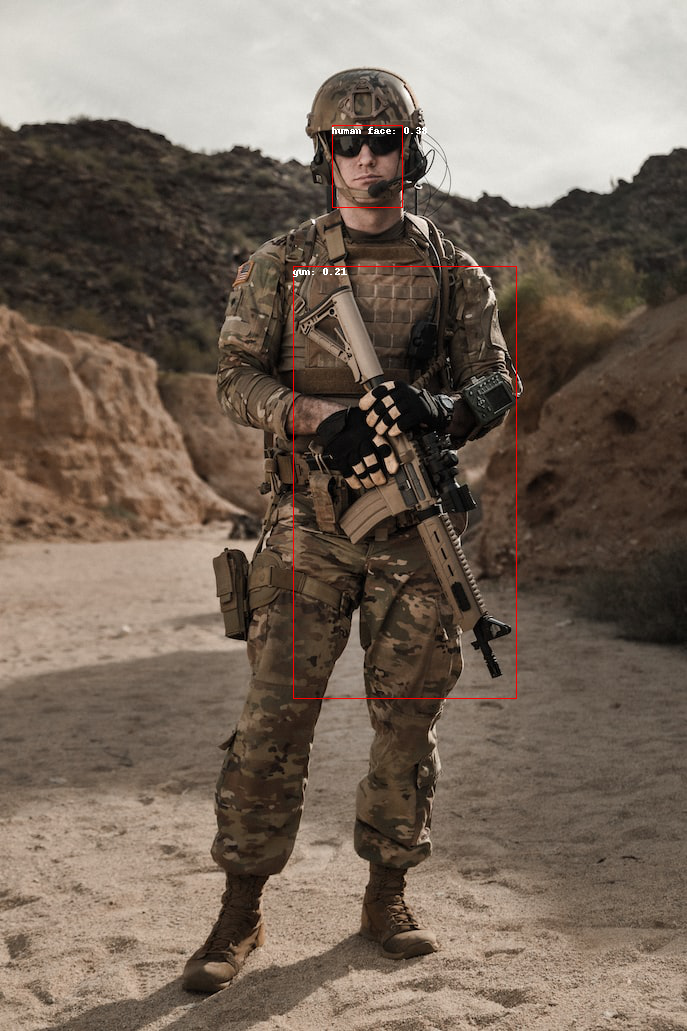

In [40]:
with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(im)

scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="white")

im

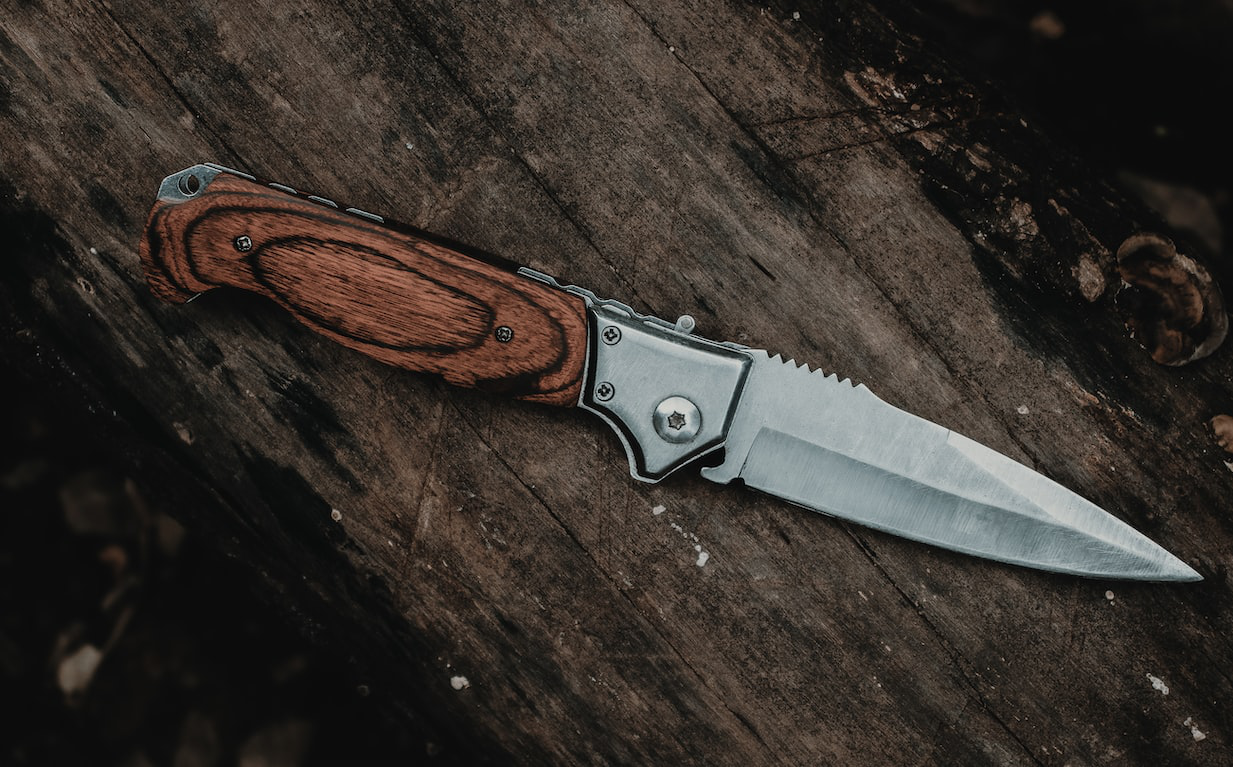

In [41]:
url = "https://images.unsplash.com/photo-1588597575483-f4e43e191c94?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1233&q=80"
im = Image.open(requests.get(url, stream=True).raw)

im

In [42]:
text_queries = ["gun","knife", "mask", "human face"]

inputs = processor(text=text_queries, images=im, return_tensors="pt")

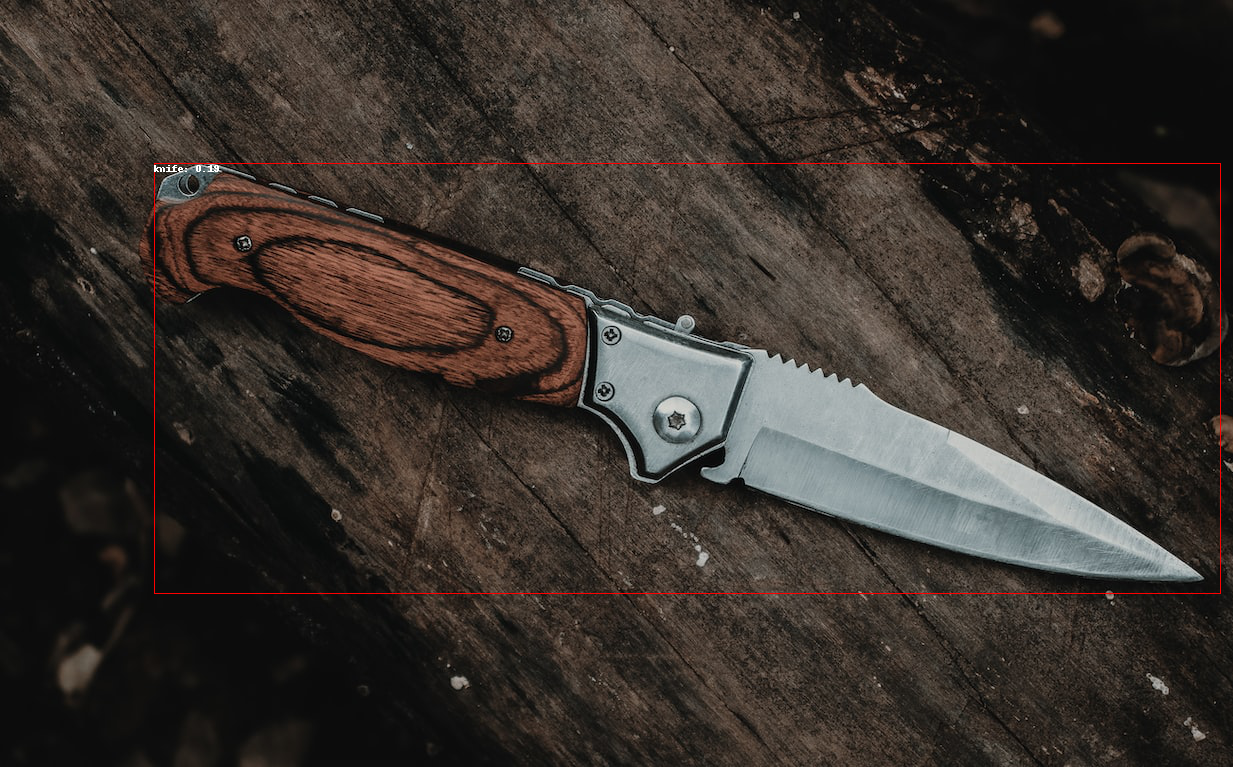

In [43]:
with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(im)

scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="white")

im